### Assignmmet EDA2: 

### Task 1 : Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('adult.csv')

# Summary statistics
print(df.describe())



                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [7]:
# Missing values
print(df.isnull().sum())



age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
# Data types
print(df.dtypes)

# Data shape
print(df.shape)



age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object
(32561, 15)


In [9]:
# Head and tail
print(df.head())
print(df.tail())



   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [10]:
# Unique values
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")



Unique values in age: 73
Unique values in workclass: 9
Unique values in fnlwgt: 21648
Unique values in education: 16
Unique values in education_num: 16
Unique values in marital_status: 7
Unique values in occupation: 15
Unique values in relationship: 6
Unique values in race: 5
Unique values in sex: 2
Unique values in capital_gain: 119
Unique values in capital_loss: 92
Unique values in hours_per_week: 94
Unique values in native_country: 42
Unique values in income: 2


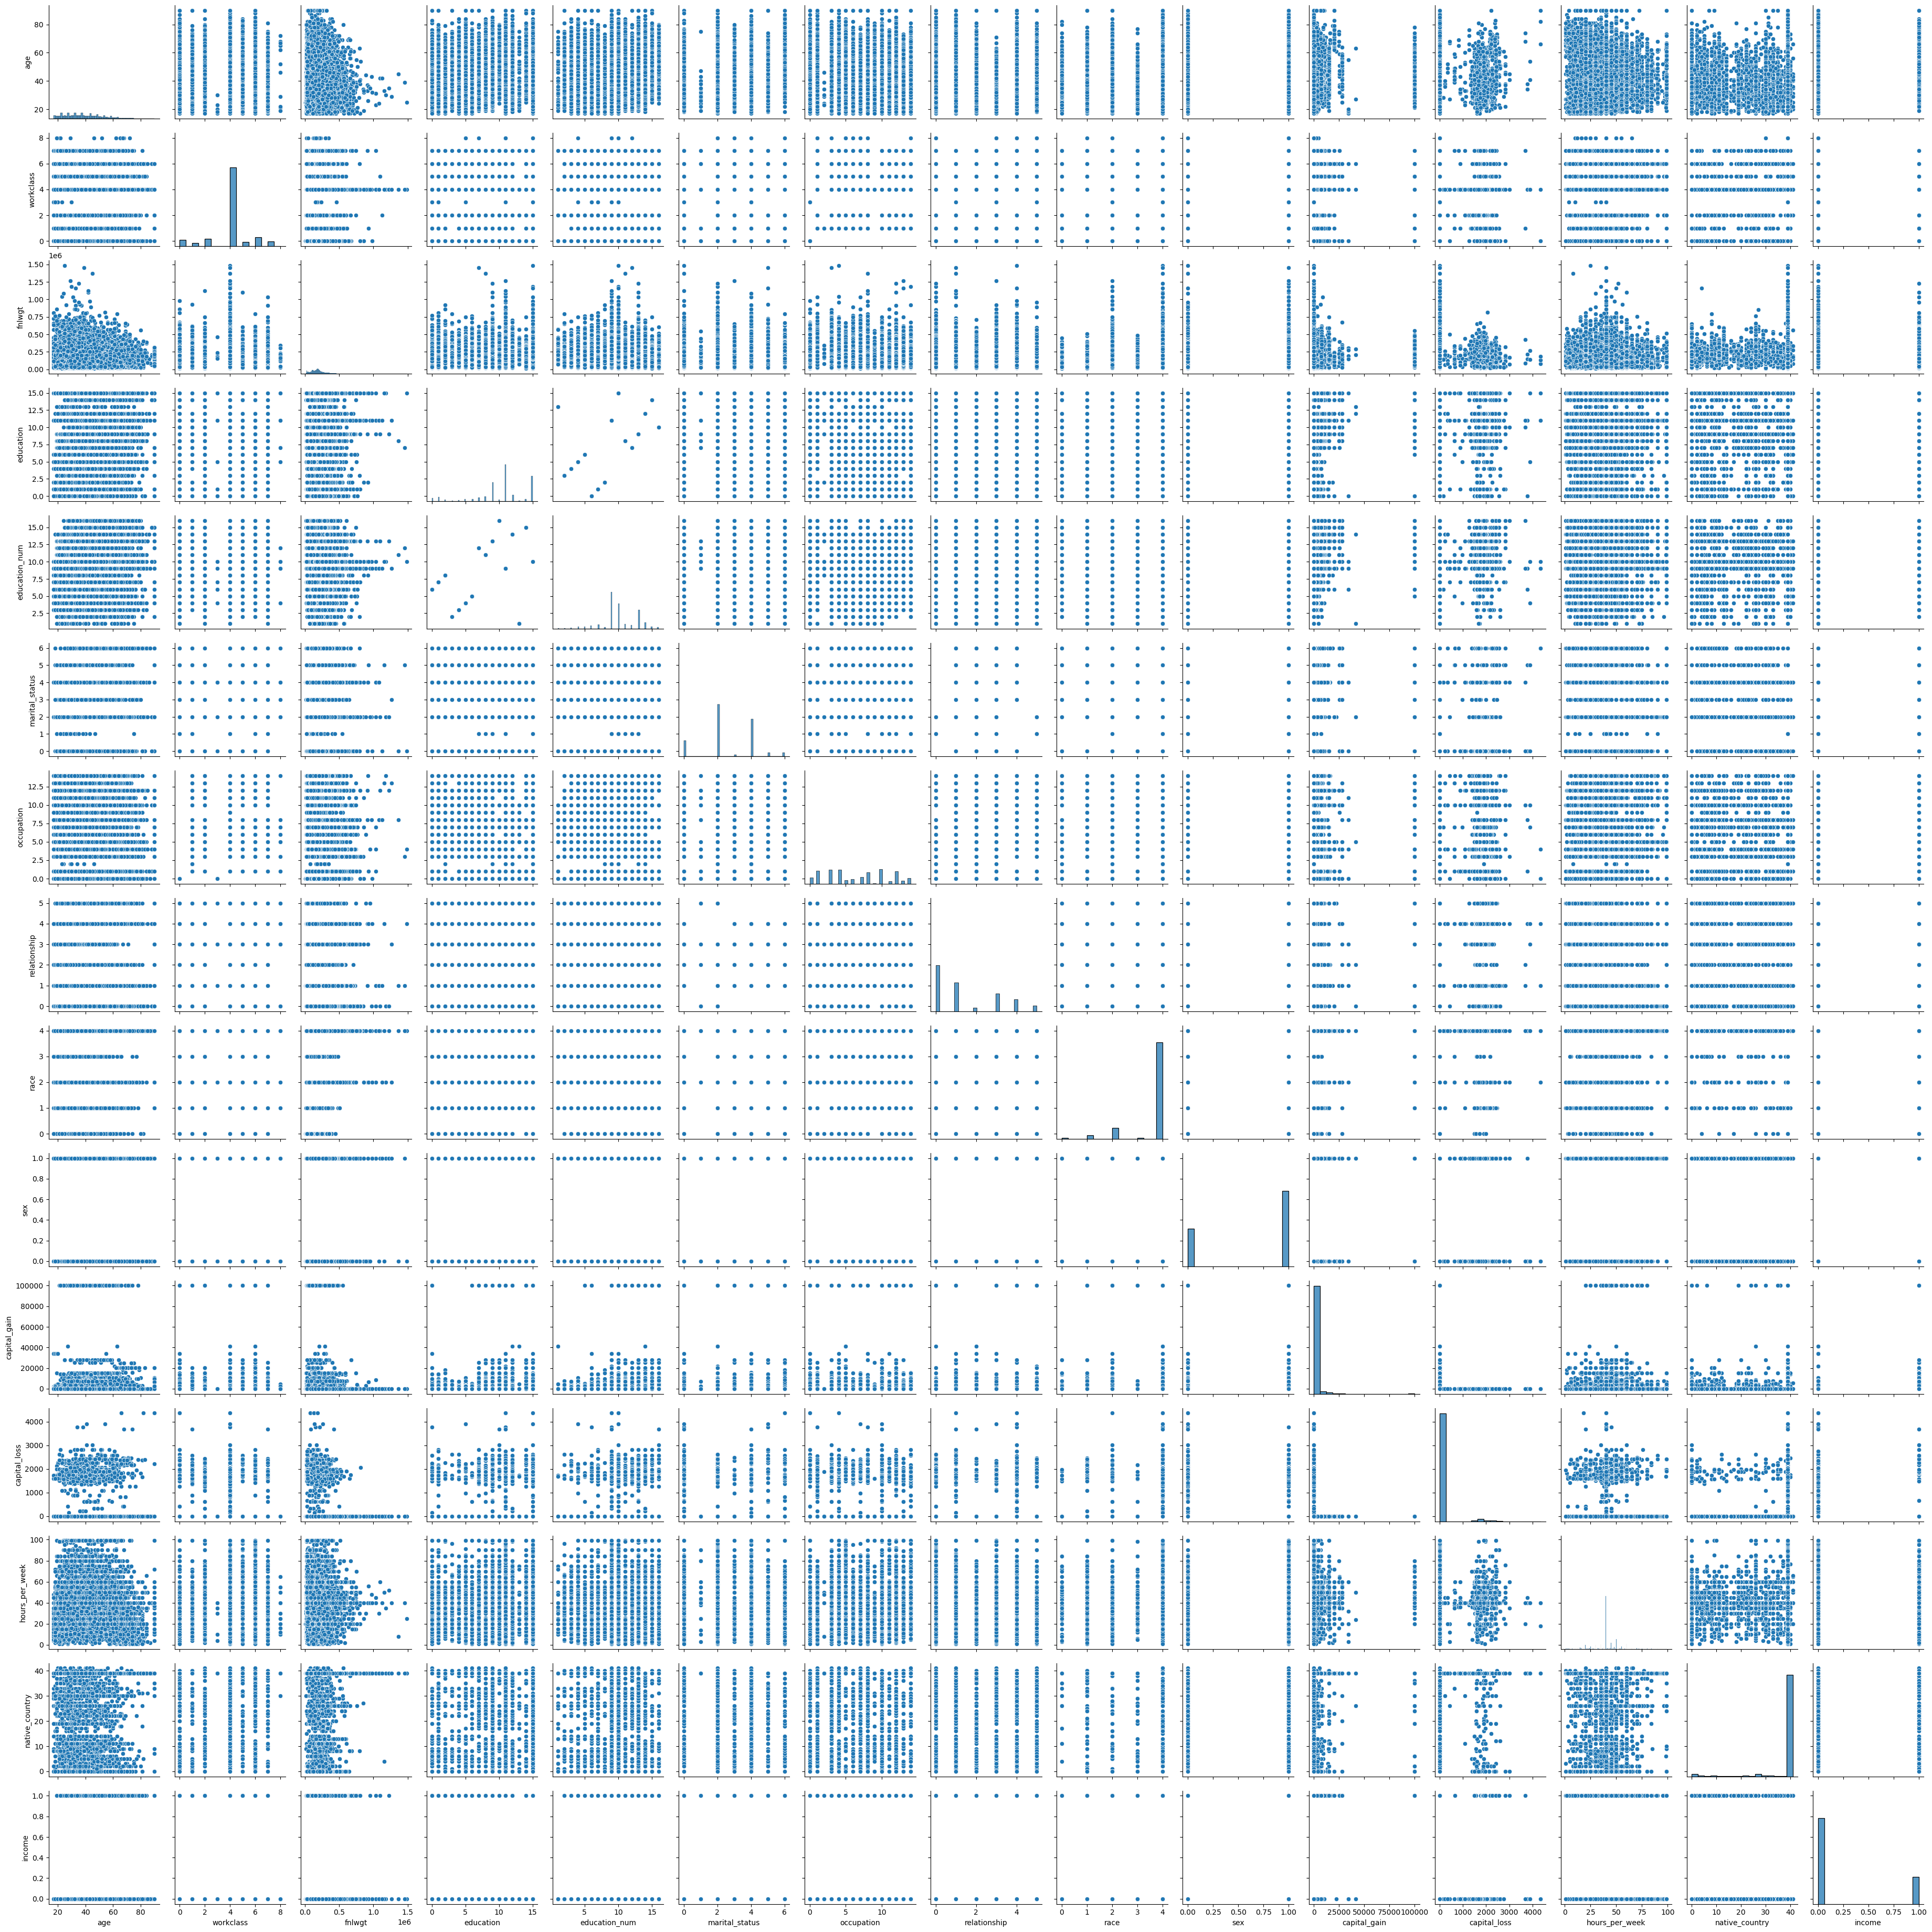

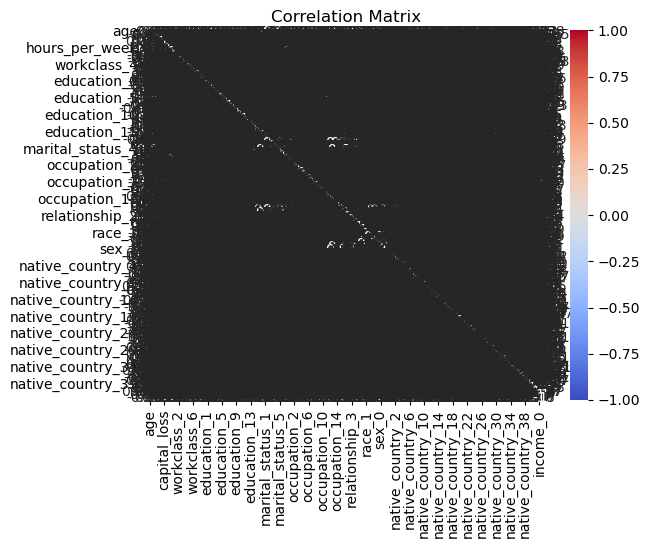

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols)

# Pairplot
sns.pairplot(df)
plt.show()

# Calculate correlations
corr_matrix = df_encoded.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [12]:
# Check remaining missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
df = pd.read_csv('adult.csv')

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [14]:
# Standard Scaling
standard_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_cols] = standard_scaler.fit_transform(df[num_cols])


# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df[num_cols])


In [15]:
print("Original Data:")
print(df.head())


Original Data:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   Unite

In [16]:
print("\nStandard Scaled Data:")
print(df_std_scaled.head())



Standard Scaled Data:
        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0  

In [17]:
print("\nMin-Max Scaled Data:")
print(df_minmax_scaled.head())


Min-Max Scaled Data:
        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0   

### Task 2 : Encoding Techniques : 

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Load dataset
df = pd.read_csv('adult.csv')


# Separate categorical columns
cat_cols = df.select_dtypes(include=['object']).columns



In [20]:
# One-Hot Encoding (OHE) for categorical variables with less than 5 categories
ohe_cols = [col for col in cat_cols if df[col].nunique() < 5]
ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(df[ohe_cols]).toarray(), columns=ohe.get_feature_names_out())


# Label Encoding (LE) for categorical variables with more than 5 categories
le_cols = [col for col in cat_cols if df[col].nunique() >= 5]
le = LabelEncoder()
for col in le_cols:
    df[col] = le.fit_transform(df[col])




In [21]:
# Concatenate encoded data with original numerical data
encoded_df = pd.concat([df.drop(cat_cols, axis=1), ohe_df], axis=1)


print("Original Data:")
print(df.head())

print("\nEncoded Data:")
print(encoded_df.head())

Original Data:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13        

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
11.953847687699799
4.594629121679692
3.096143524467517
4.307536865725205


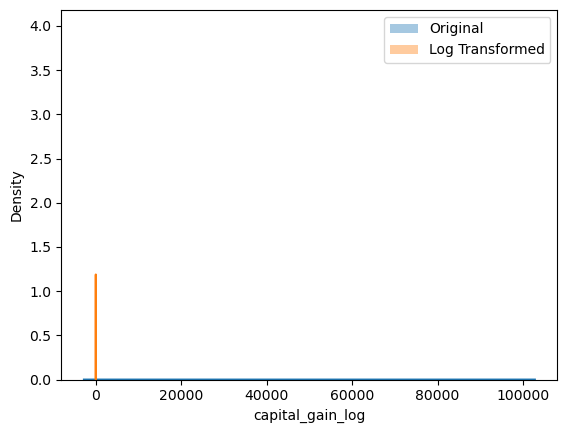

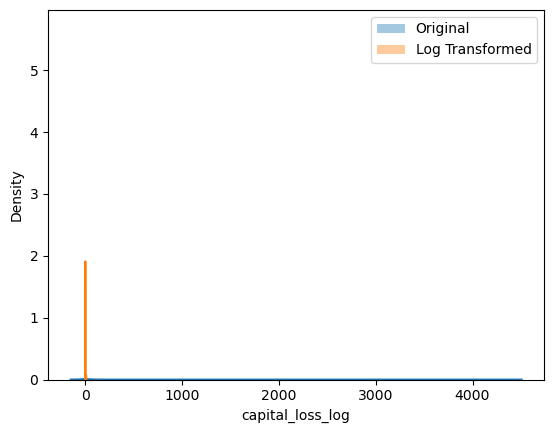

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('adult.csv')

# Print column names
print(df.columns)

# Update column names
actual_column_name_gain = 'capital_gain'  # Replace with actual column name
actual_column_name_loss = 'capital_loss'  # Replace with actual column name

# Check skewness
print(df[actual_column_name_gain].skew())
print(df[actual_column_name_loss].skew())

# Log transformation
df['capital_gain_log'] = np.log1p(df[actual_column_name_gain])
df['capital_loss_log'] = np.log1p(df[actual_column_name_loss])

# Verify skewness reduction
print(df['capital_gain_log'].skew())
print(df['capital_loss_log'].skew())

# Visualize transformation effect
sns.distplot(df[actual_column_name_gain], label='Original')
sns.distplot(df['capital_gain_log'], label='Log Transformed')
plt.legend()
plt.show()

sns.distplot(df[actual_column_name_loss], label='Original')
sns.distplot(df['capital_loss_log'], label='Log Transformed')
plt.legend()
plt.show()


### Task 4 :Feature Selection:

In [24]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder


# Load dataset
df = pd.read_csv('adult.csv')

# Print column names
print(df.columns)




Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [25]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


# Task 4.1: Isolation Forest for Outlier Removal
iforest = IsolationForest(contamination=0.01)
iforest.fit(df[num_cols])
outlier_prediction = iforest.predict(df[num_cols])

# Remove outliers
df_clean = df[outlier_prediction == 1]
print("Original shape:", df.shape)
print("Clean shape:", df_clean.shape)


# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])


# Task 4.2: Predictive Power Score (PPS)
def calculate_pps(X, y):
    pps = []
    for col in X.columns:
        mean_target = y.mean()
        std_target = y.std()
        
        if X[col].dtype.kind == 'O':  # Categorical column
            mean_cond = y.groupby(X[col]).mean()
            std_cond = y.groupby(X[col]).std()
        else:  # Numerical column
            bins = pd.qcut(X[col], 5, duplicates='drop')
            mean_cond = y.groupby(bins).mean()
            std_cond = y.groupby(bins).std()
        
        pps_col = (mean_cond - mean_target) / std_target - (std_cond / std_target)
        pps.append(pps_col.mean())
    return pps


pps_scores = calculate_pps(df_clean.drop('income', axis=1), df_clean['income'])
pps_df = pd.DataFrame({'Feature': df_clean.drop('income', axis=1).columns, 'PPS': pps_scores})
pps_df = pps_df.sort_values(by='PPS', ascending=False)
print(pps_df)




Original shape: (32561, 15)
Clean shape: (32235, 15)
           Feature       PPS
4    education_num -0.798713
6       occupation -0.877377
0              age -0.905253
12  hours_per_week -0.906433
7     relationship -0.922535
5   marital_status -0.942711
1        workclass -0.950266
3        education -0.993201
2           fnlwgt -0.999453
8             race -1.000000
9              sex -1.000000
10    capital_gain -1.000000
11    capital_loss -1.000000
13  native_country -1.023660


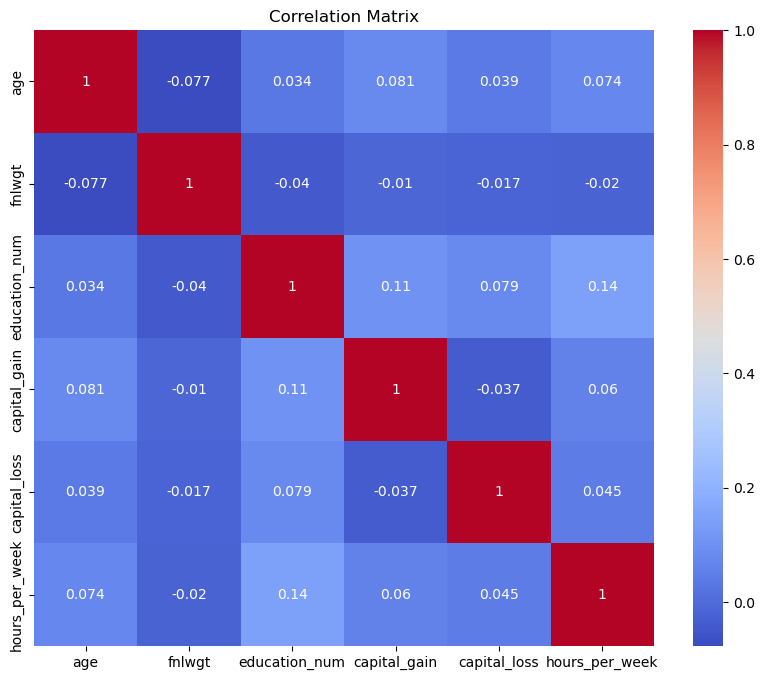

In [26]:
# Correlation Matrix (only for numerical columns)
corr_matrix = df_clean[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [27]:

# Compare PPS and Correlation Matrix findings
print("Top 5 PPS features:")
print(pps_df.head(5))
print("\nHighly correlated features:")
for col in num_cols:
    print(f"Features correlated with {col}:")
    print(corr_matrix[col].sort_values(ascending=False).head(5))

Top 5 PPS features:
           Feature       PPS
4    education_num -0.798713
6       occupation -0.877377
0              age -0.905253
12  hours_per_week -0.906433
7     relationship -0.922535

Highly correlated features:
Features correlated with age:
age               1.000000
capital_gain      0.080929
hours_per_week    0.074319
capital_loss      0.038983
education_num     0.033879
Name: age, dtype: float64
Features correlated with fnlwgt:
fnlwgt            1.000000
capital_gain     -0.010230
capital_loss     -0.016553
hours_per_week   -0.020435
education_num    -0.040004
Name: fnlwgt, dtype: float64
Features correlated with education_num:
education_num     1.000000
hours_per_week    0.143289
capital_gain      0.106705
capital_loss      0.079374
age               0.033879
Name: education_num, dtype: float64
Features correlated with capital_gain:
capital_gain      1.000000
education_num     0.106705
age               0.080929
hours_per_week    0.060383
fnlwgt           -0.010230
Name